Tarea III: Parte II - Modelo de Ising


A continuación se describe un algorítmo para la implementación del modelo de Ising en 2 dimensiones. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import collections 


%matplotlib inline

In [22]:
#---------------------------------------------------------
# Función para generar un estado de la malla arealtorio:
# cada átomo en un estado de espin aleatorio
#---------------------------------------------------------

def initial_microstate(N):   
    #microestado aleatorio de L átomos. L = N x N
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

#---------------------------------------------------------
# Movidas de monte carlos usando el algoritmo Metropolis 
# para generar o no un microestado nuevo
#---------------------------------------------------------

def monte_carlo_realization(microstate, N, beta):
   
    for i in range(N):
        for j in range(N):
            
                #escogemos aleatoriamente la posición del 
                #átomo (s) en la malla: (fila(a),columna(b))
                
                a = np.random.randint(0, N) #0 y N-1
                b = np.random.randint(0, N)
               
                s =  microstate[a, b]
                
                #vecinos del átomo s:
                ngb1 = microstate[a,(b+1)%N]
                ngb2 = microstate[(a-1)%(N),b]
                ngb3 = microstate[a,(b-1)%N]
                ngb4 = microstate[(a+1)%(N),b]
            
                deltaE = 2*s*(ngb1 + ngb2 + ngb3 + ngb4)
                
                if deltaE < 0: #acepte con probabilidad igual 1 el cambio de espín
                    s *= -1
                elif random.uniform(0.0,1.0) < np.exp(-deltaE*beta):
                    s *= -1
                    
                #cambie el espín del átomo y guardelo en su posición, 
                #esto genera un nuevo microestado
                microstate[a, b] = s
                
    return microstate

#----------------------------
# Energía de un microestado
#----------------------------

def microstate_energy(microstate, N):
    energy = 0
    for i in range(len(microstate)):
        for j in range(len(microstate)):
            #S: espín del átomo en la fila i columna j
            S = microstate[i,j]
            ngb1 = microstate[i,(j+1)%N]
            ngb2 = microstate[(i-1)%N, j]
            ngb3 = microstate[i,(j-1)%N]
            ngb4 = microstate[(i+1)%N, j]
            energy += -S*(ngb1 + ngb2 + ngb3 + ngb4)     
    return energy

#---------------------------------
# Magnetización de un microestado
#---------------------------------

def magnetization(microstate):
    mag = np.sum(microstate)
    return mag



Temperatura Fija:



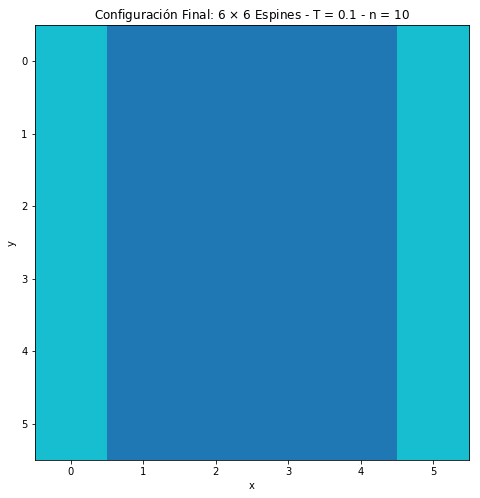

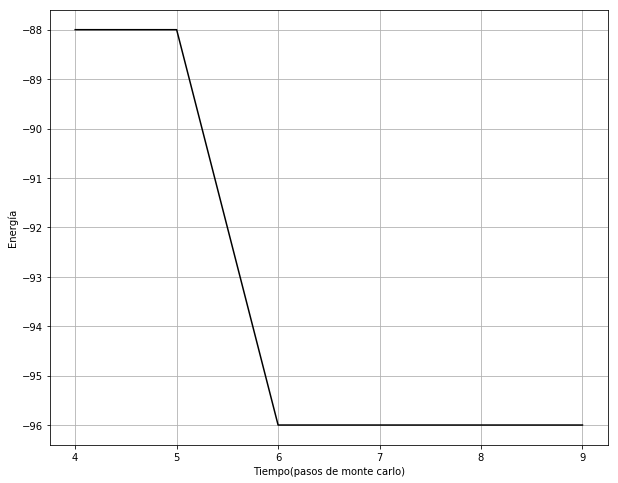

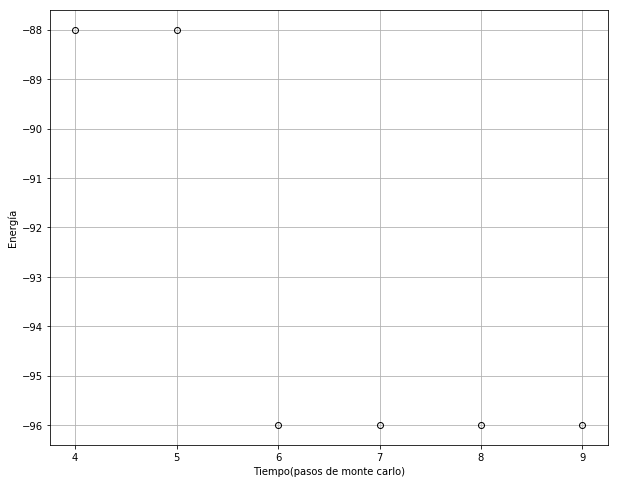

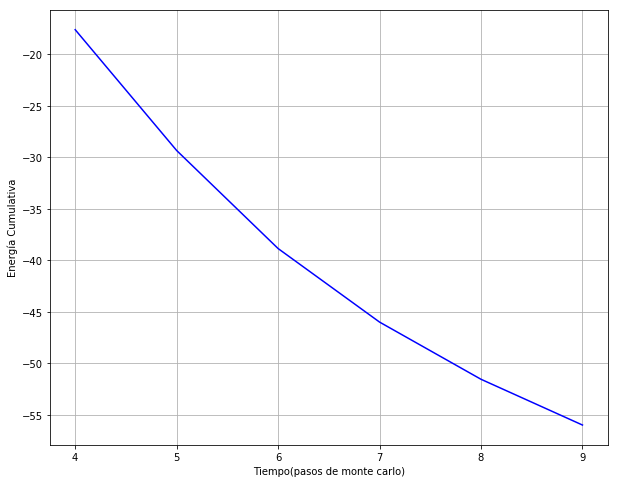

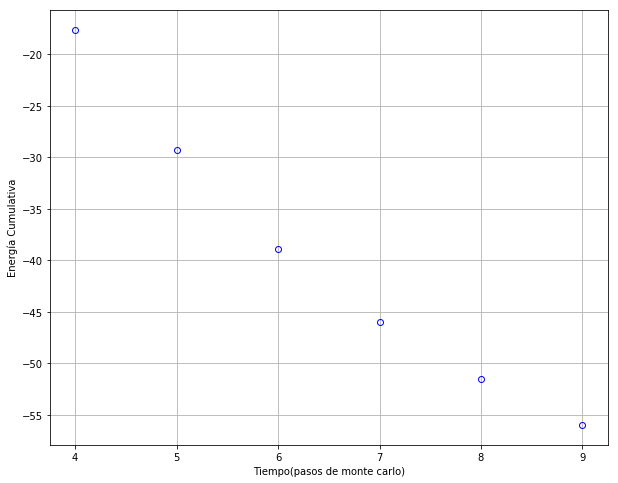

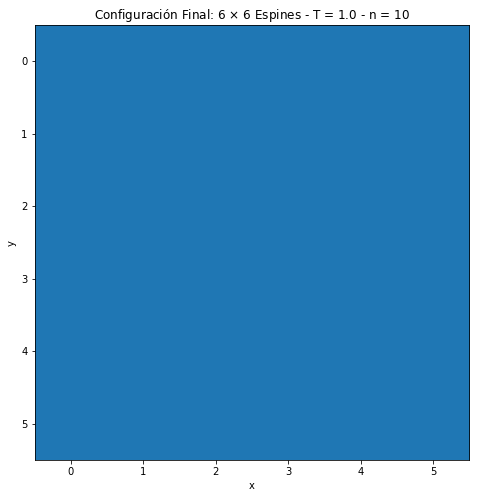

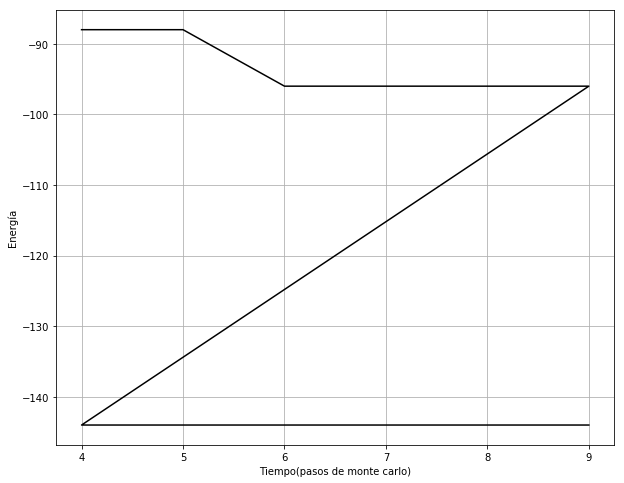

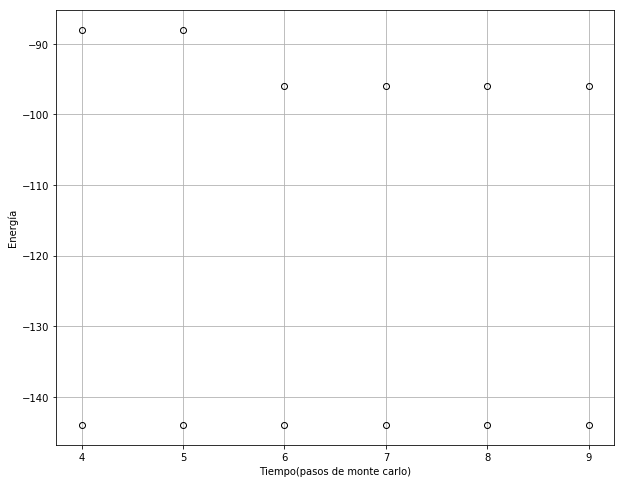

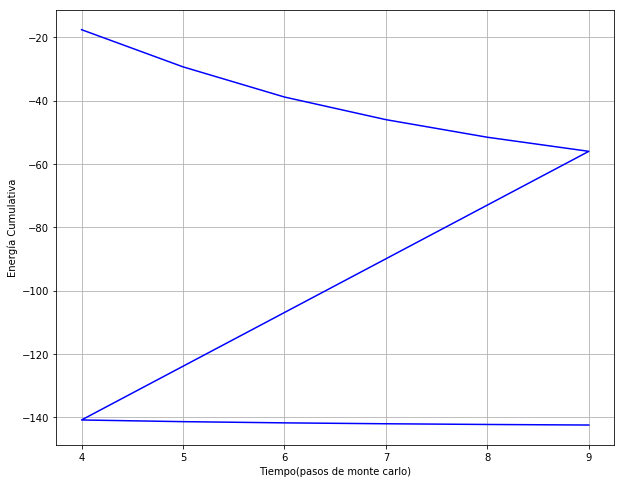

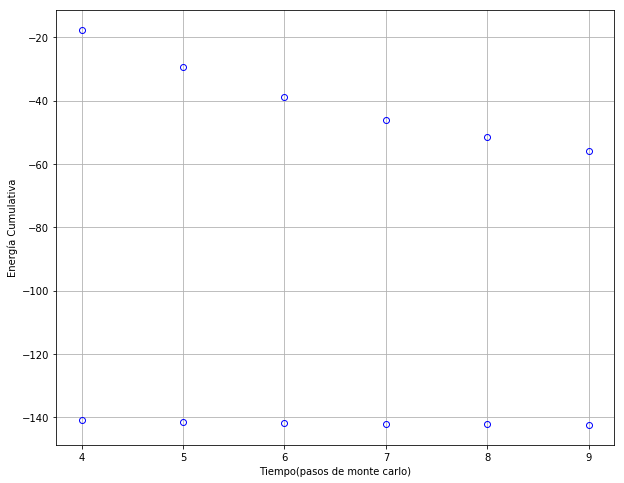

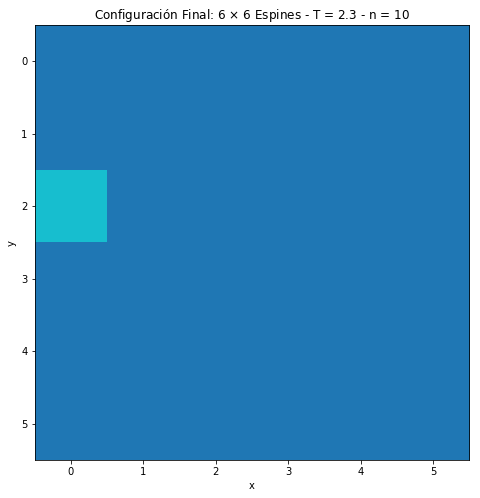

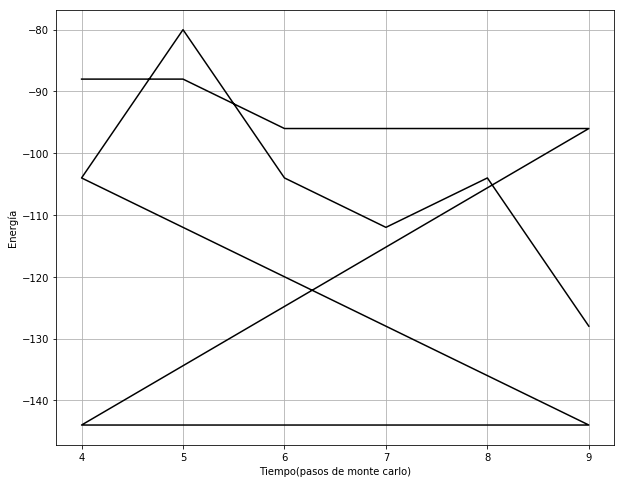

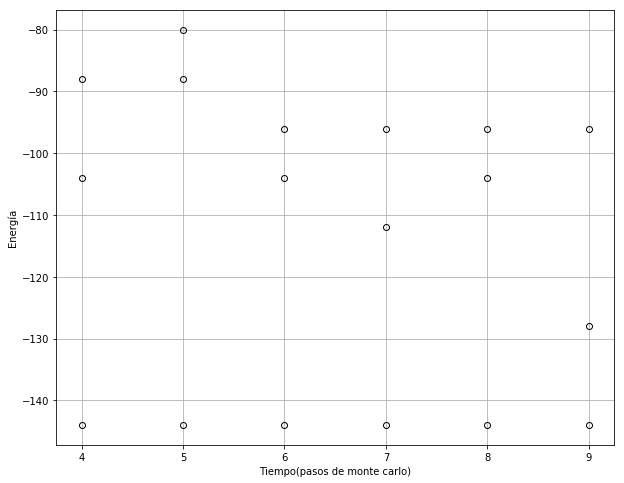

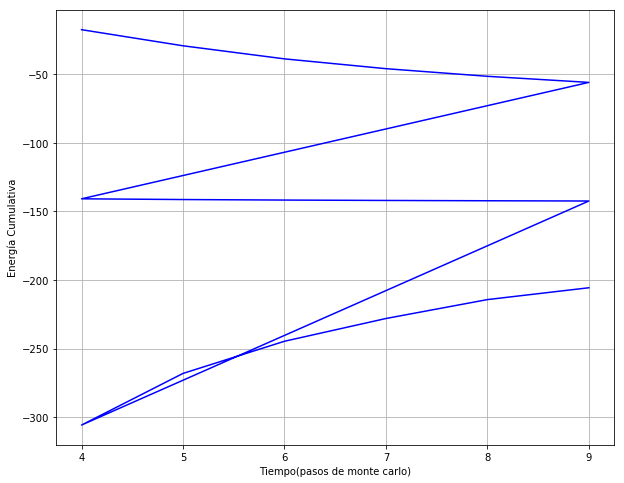

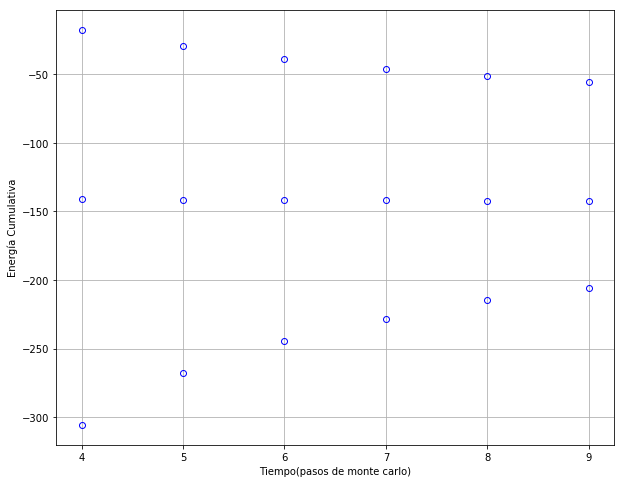

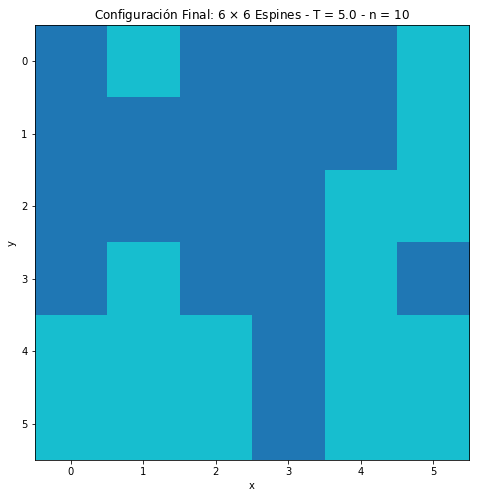

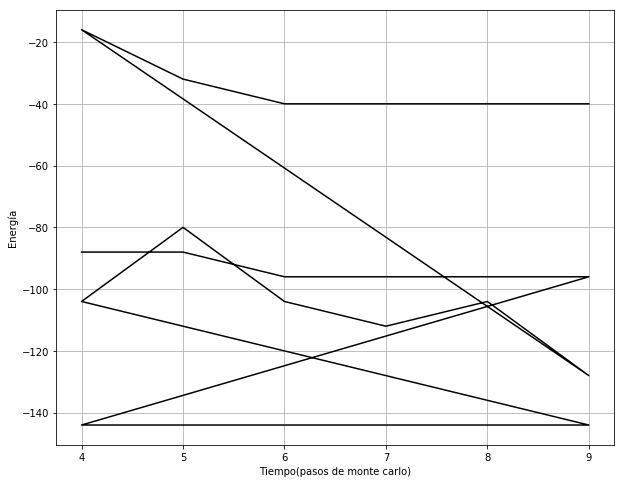

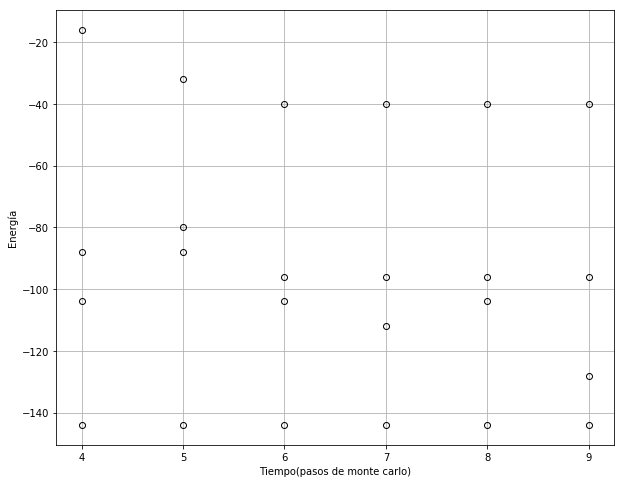

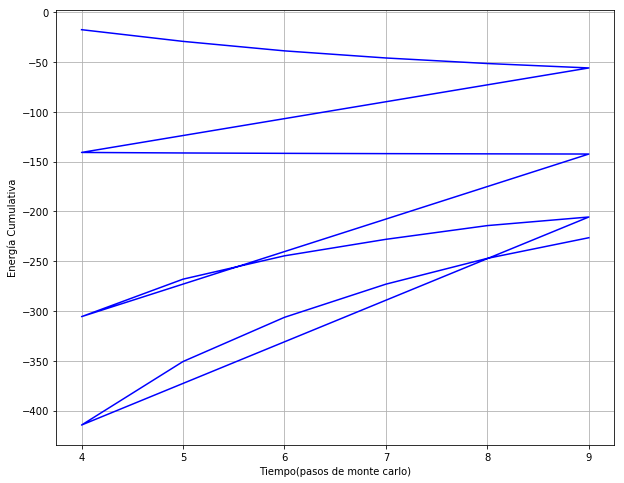

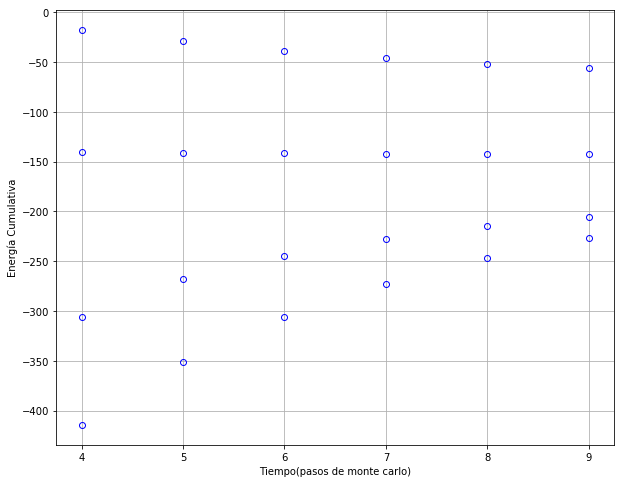

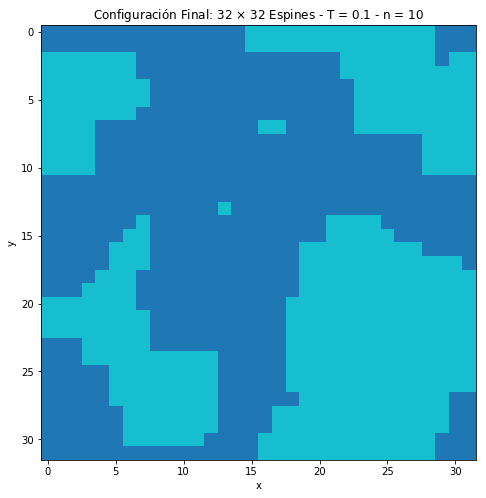

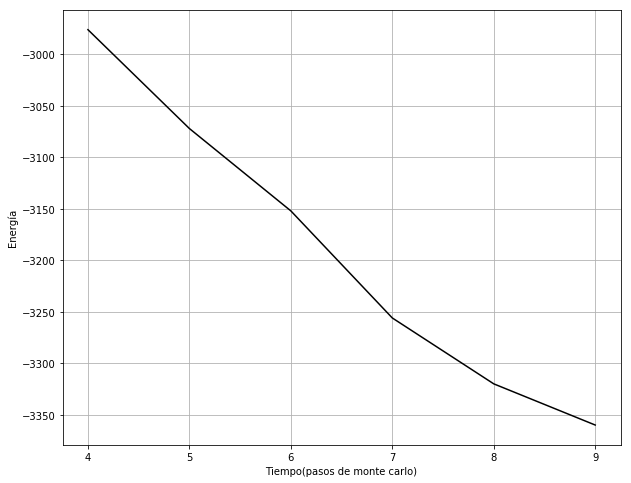

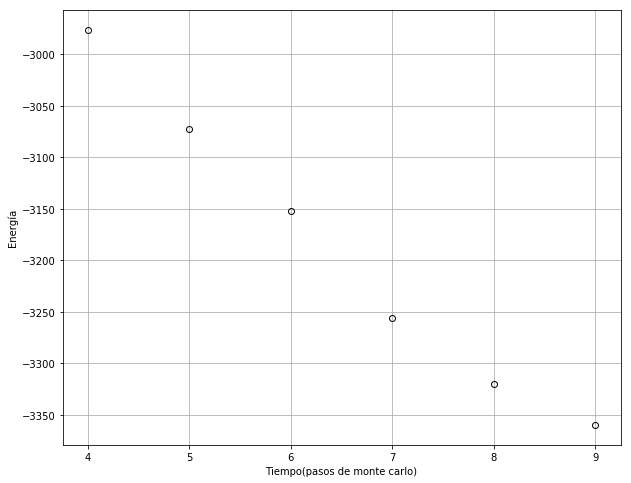

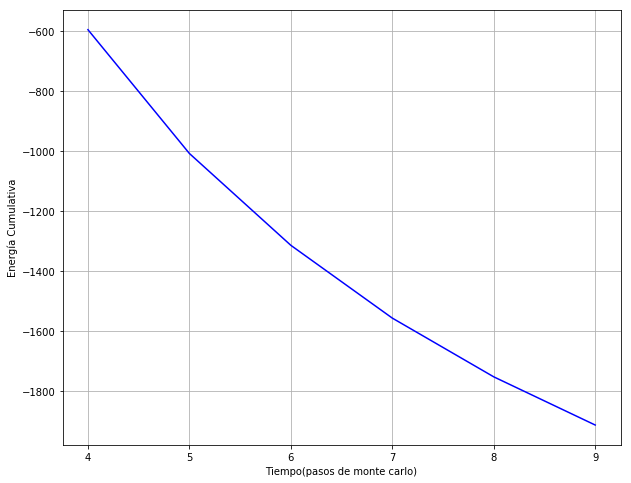

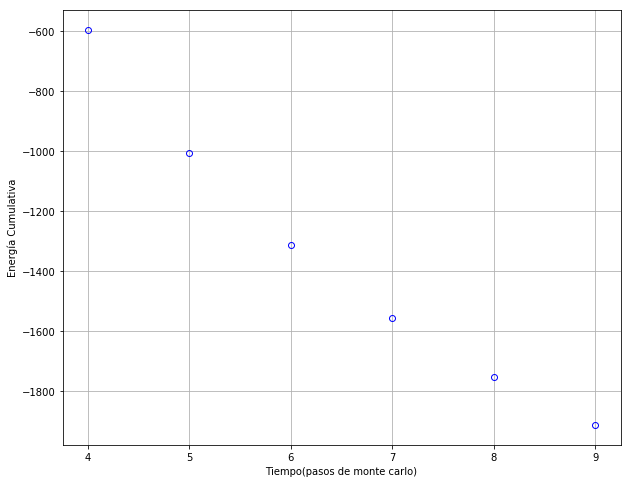

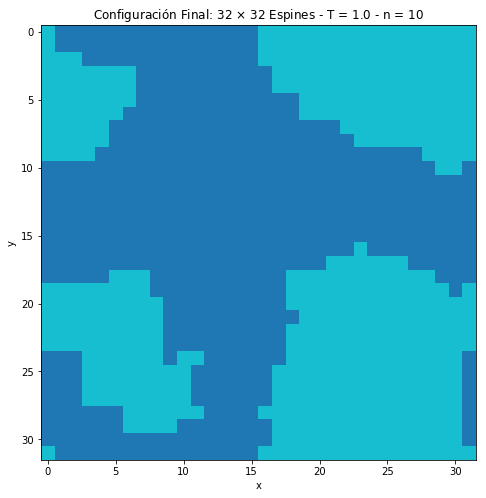

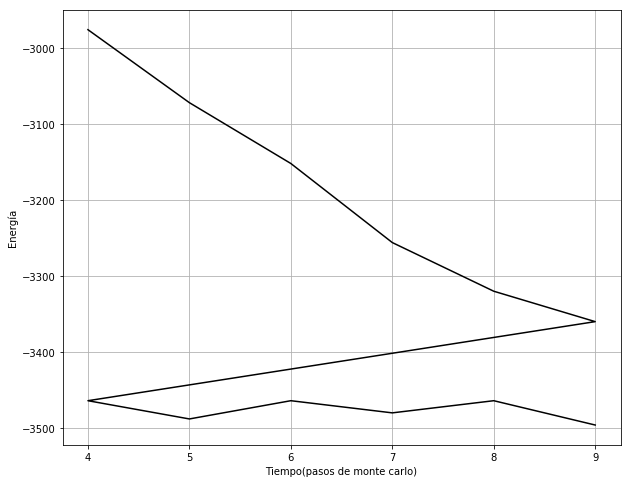

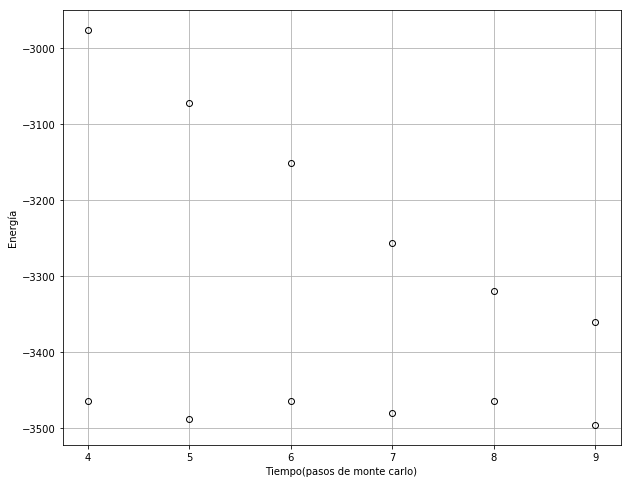

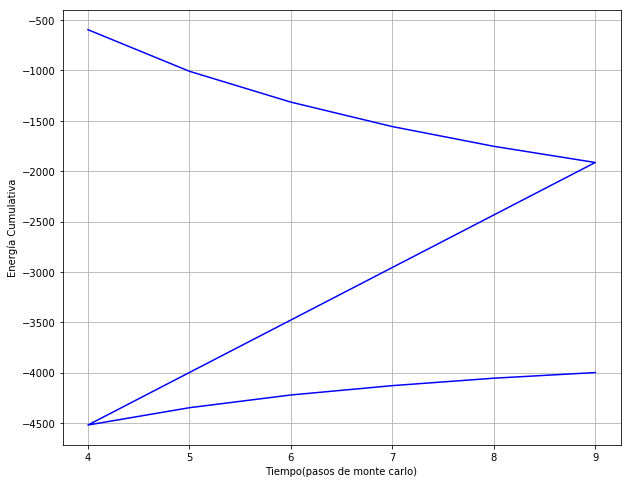

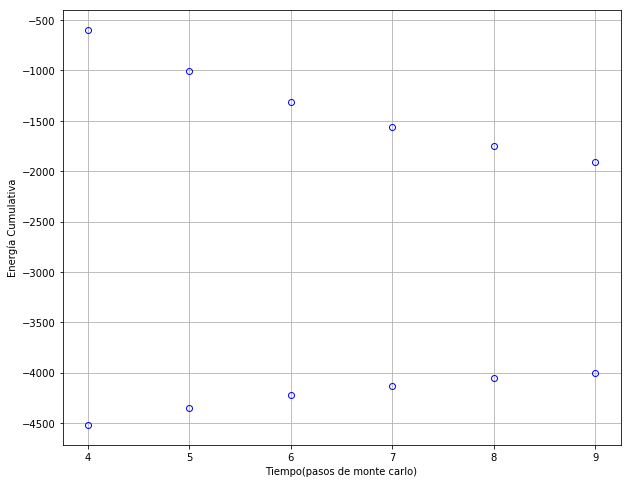

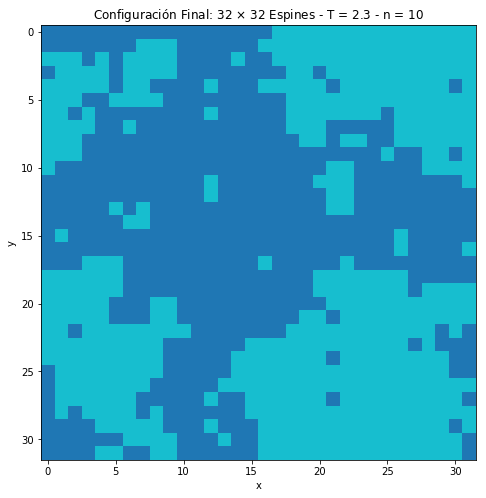

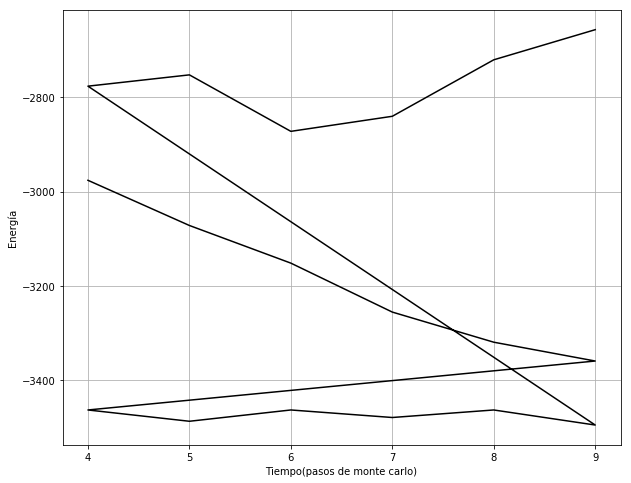

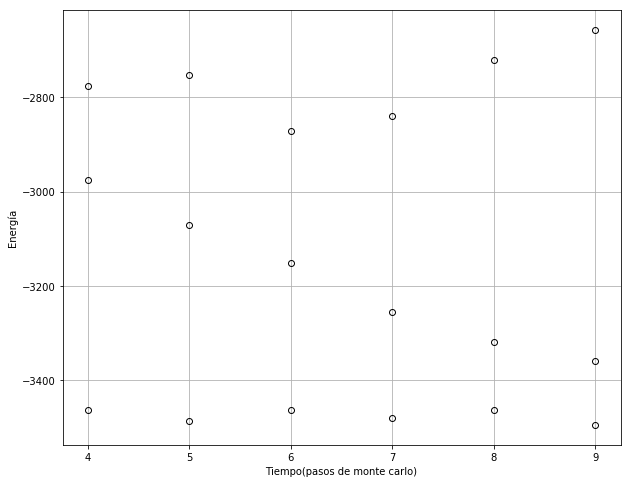

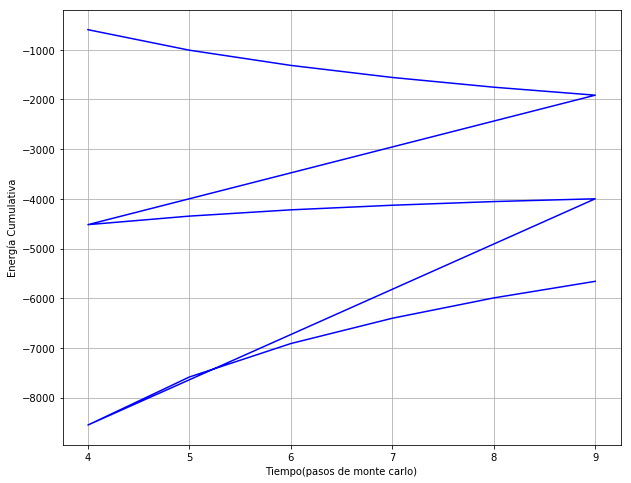

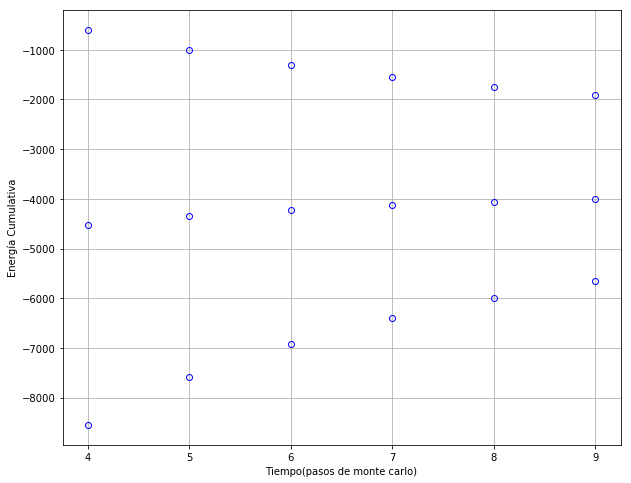

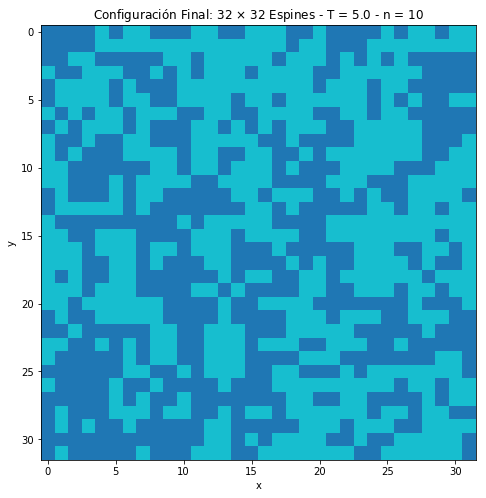

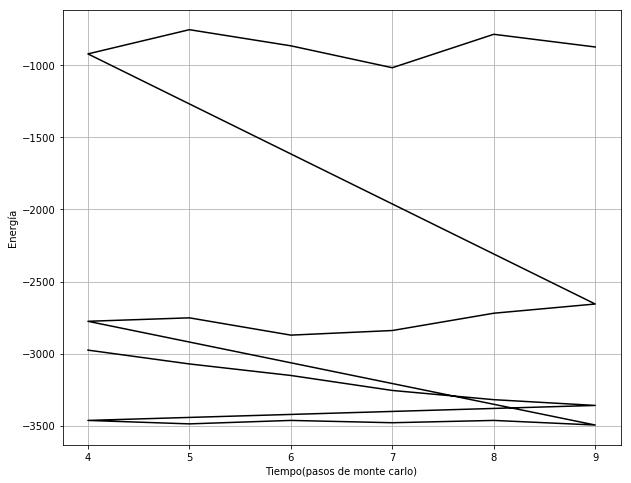

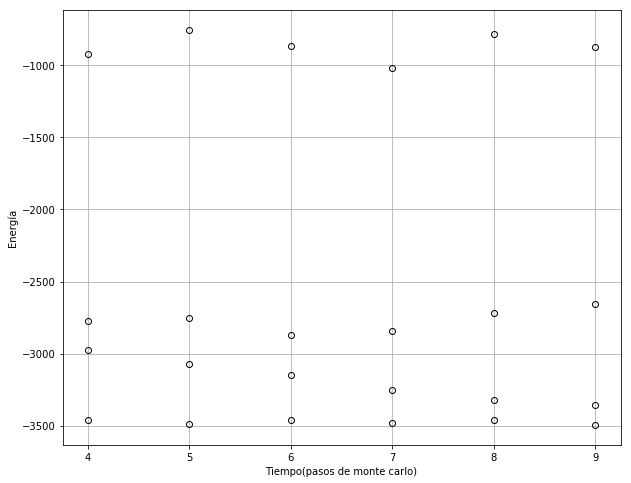

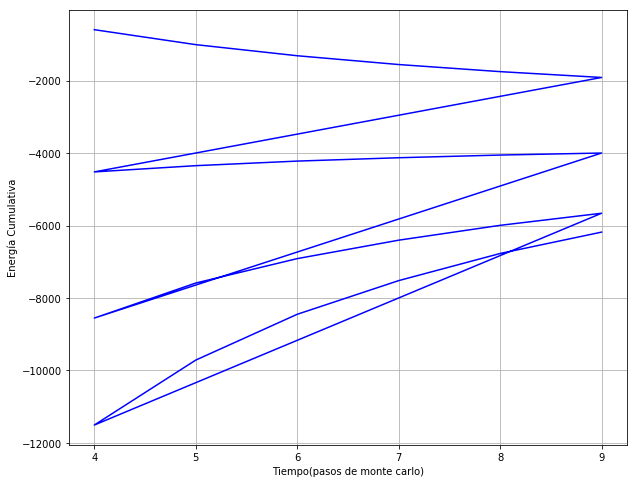

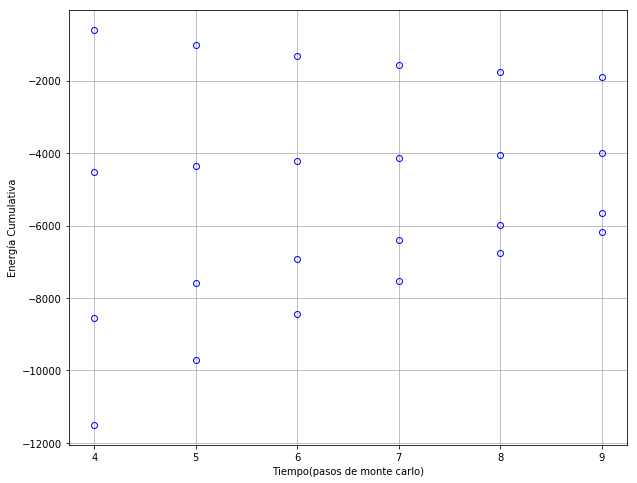

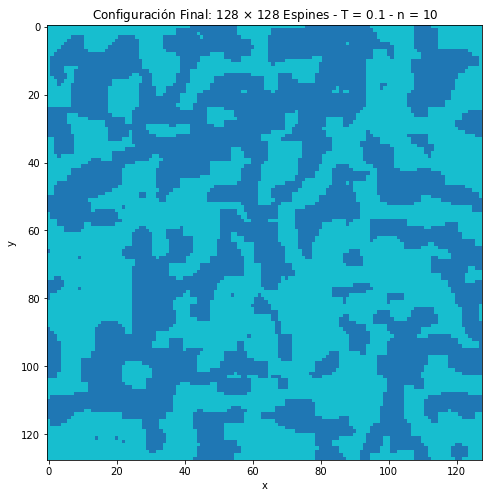

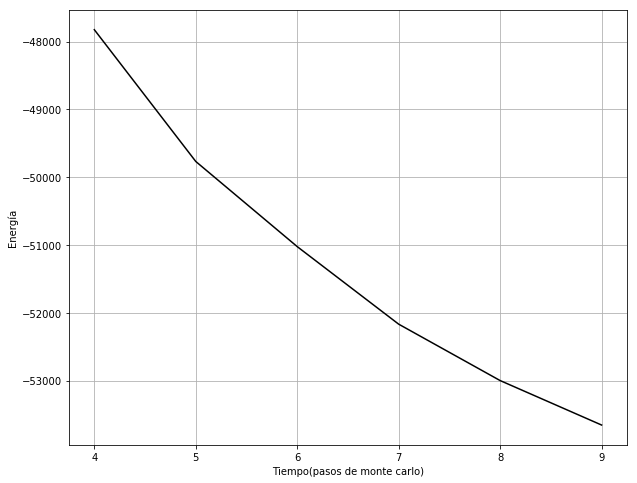

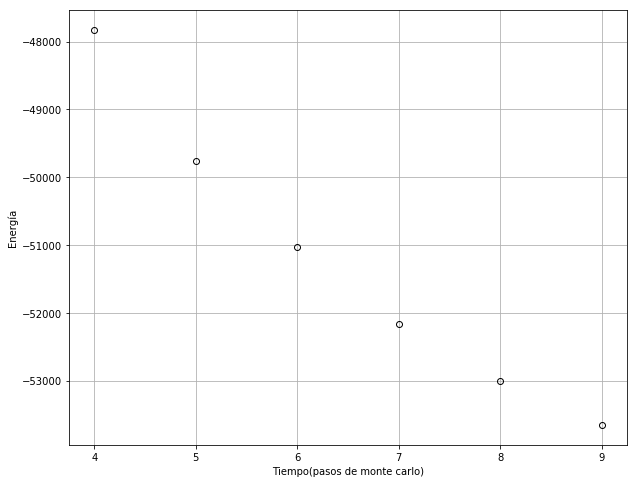

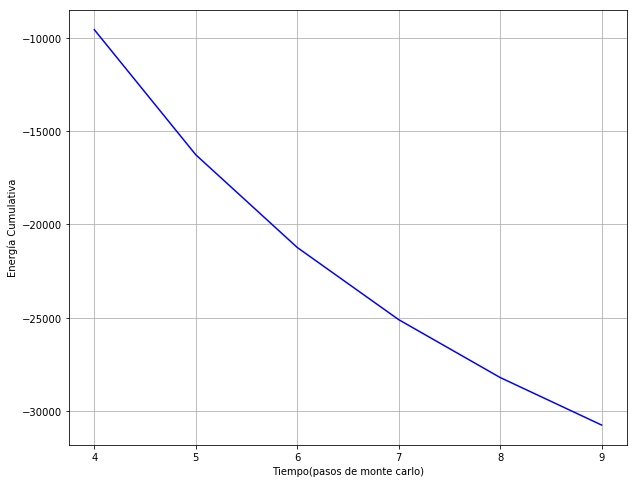

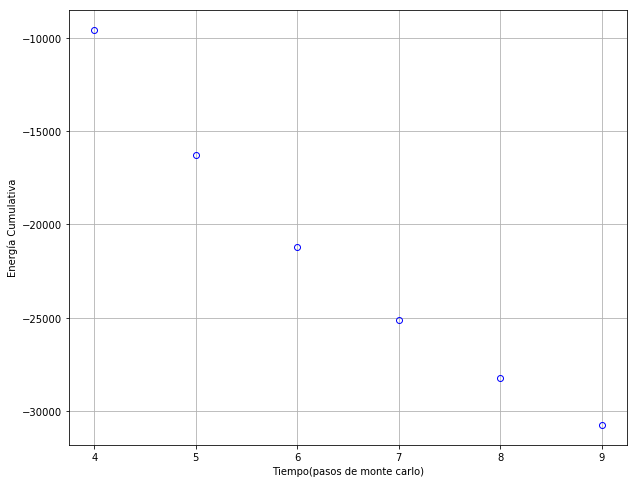

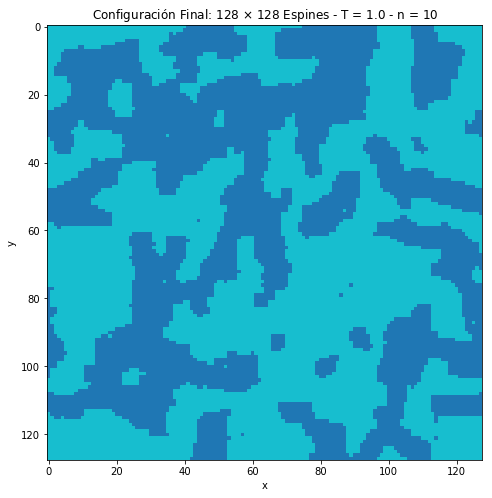

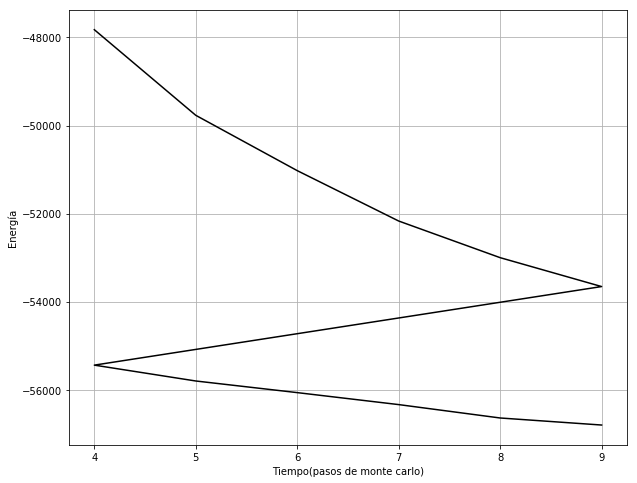

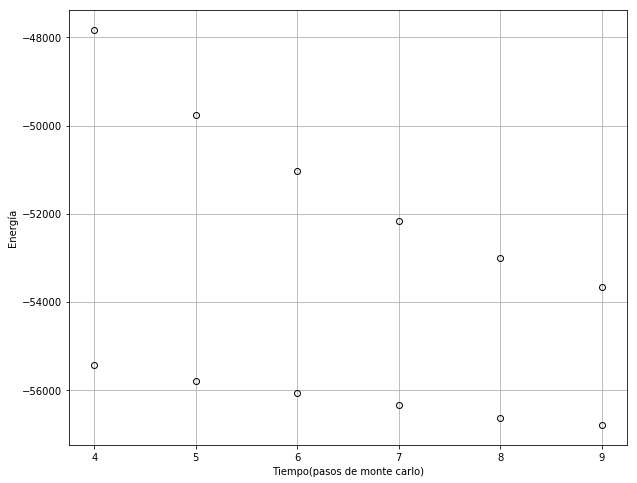

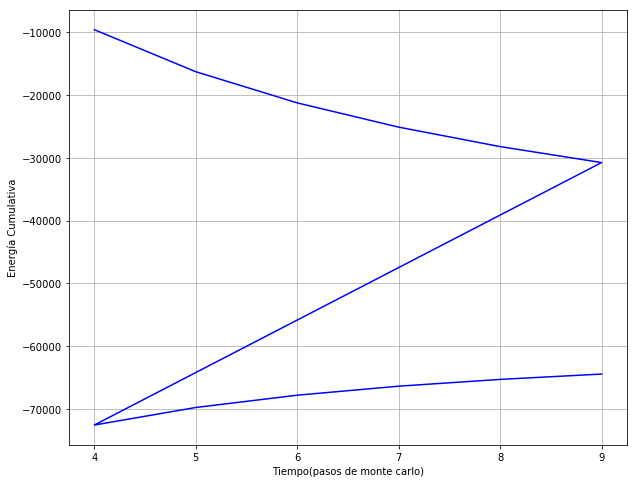

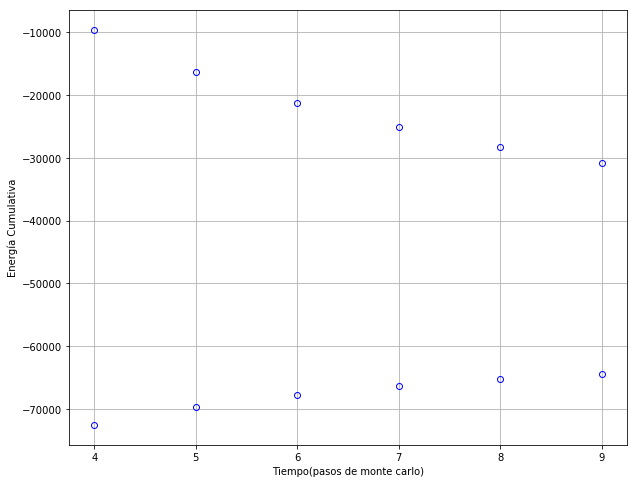

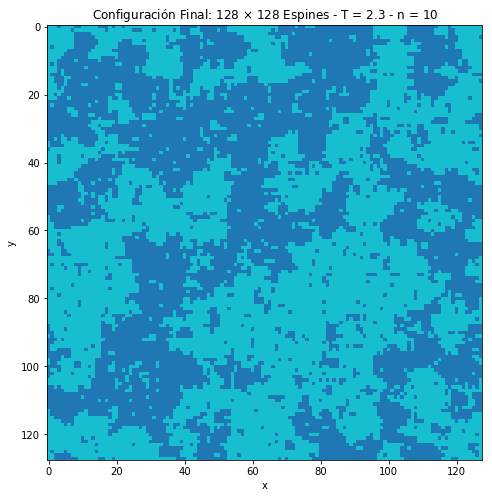

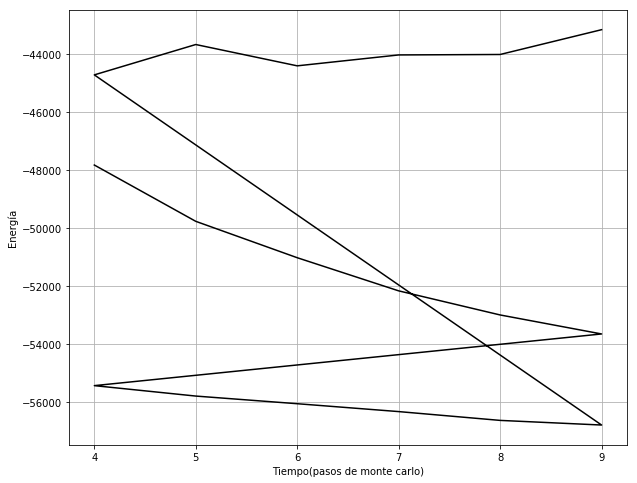

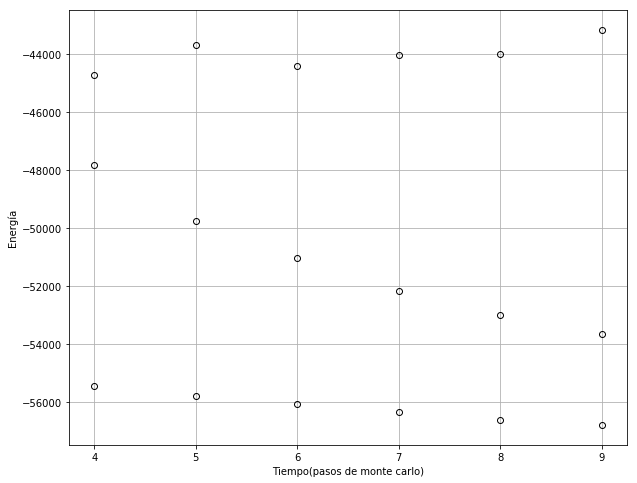

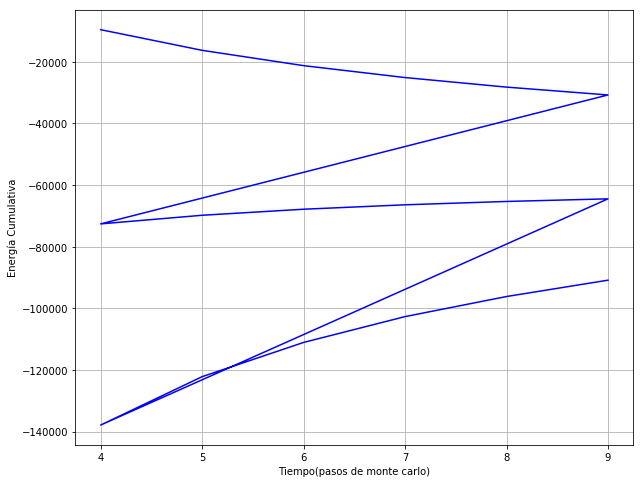

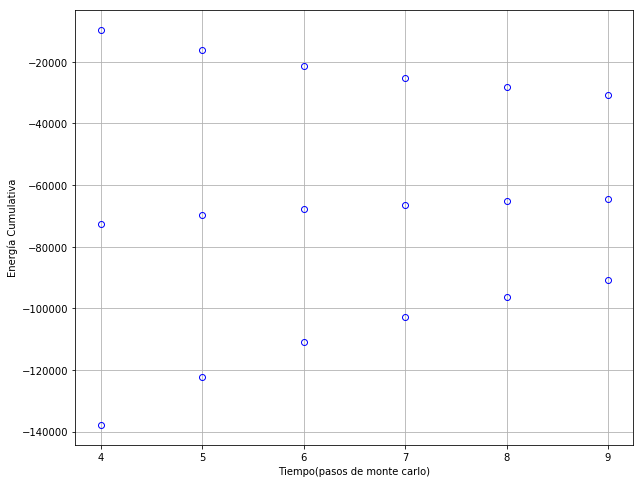

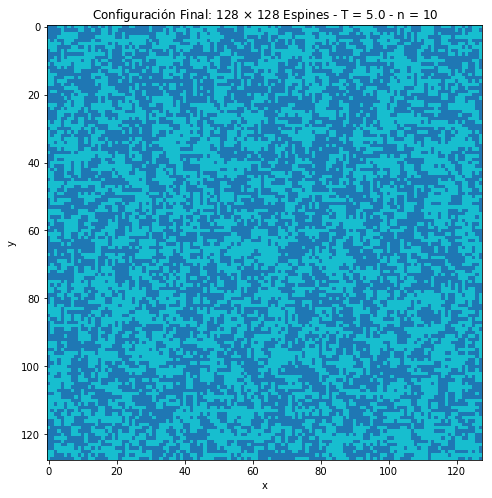

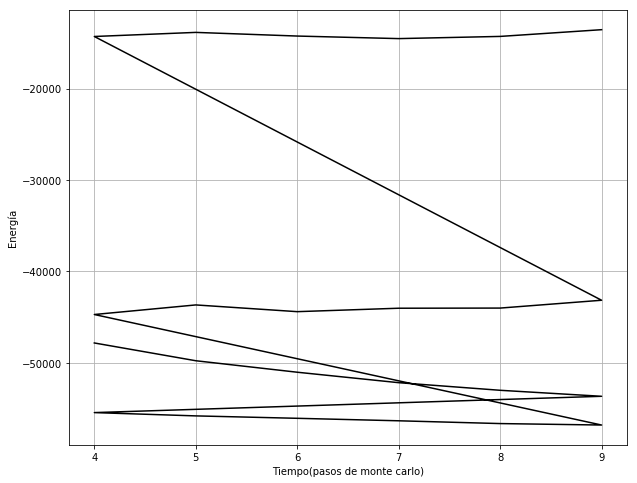

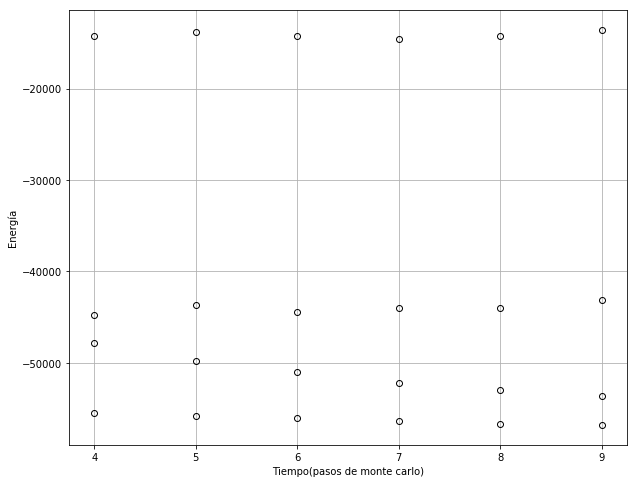

Done


In [ ]:
#--------------------------------
# parámetros para las pruebas
#--------------------------------

#------------------------------
#tamaño de la malla: L = N x N
#------------------------------

N        = [6,32,128]      
#N       = 2
#N       = 6
#N       = 8

#-------------------------------------
# Temperatura fija
#-------------------------------------

T = [0.1,1.0,2.269,5.0]


for k in N:
    
    #--------------------------------------------
    #fijar configuración inicial para una T fija
    #--------------------------------------------
    
    Microstate = initial_microstate(k)
    E = []
    M = []
    t_steps = []
    E_cumulative = []
    E_cum = 0.0
    
    #---------------------
    #pasos de monte carlo
    #---------------------
    
    #n_steps = N*10000
    n_steps = 10
    for j in T:
        
        beta = 1/j
        
        for i in range(n_steps):
        
            monte_carlo_realization(Microstate, k, beta)
        
            #energía
            Ene = microstate_energy(Microstate, k)
        
            #magnetización
            Mag = magnetization(Microstate) 
            
            #guardamos solo los valores del muestreo 
            #respresentativo correspondientes 
            #a la relajación del sistema: equilibrio
        
            if i>(n_steps/3):
                t_steps.append(i)
                E.append(Ene)
                M.append(Mag)
                E_cum =  E_cum + Ene
                E_cumulative.append(E_cum/(i+1))
        
        #-----------------        
        #archivo de datos
        #-----------------
                
        f = open('%dx%d_T%0.1f_nsteps%d.dat'%(k,k,j,n_steps),'w')

        for p in range (len(E)):
            f.write("%d %.8f %.8f %.8f\n"%(t_steps[p], E[p], M[p], E_cumulative[p]))
        f.close()
        
        #-----------------------
        #graficas snap final
        #-----------------------

        plt.figure(figsize=(10,8))
        plt.imshow(Microstate, cmap = 'tab10',interpolation="nearest")
        plt.xlabel(r"x")
        plt.ylabel(r"y")
        plt.title(r"Configuración Final: %d $\times$ %d Espines - T = %0.1f - n = %d"%(k,k,j,n_steps))
        plt.savefig("temperatura_fija/finalsnap_%dx%d_T%.0f_nsteps%d.png"%(k,k,j,n_steps))
        plt.clf()
        

        #-----------------------
        #graficas E vs t_steps
        #-----------------------

        plt.figure(figsize=(10,8))
        plt.plot(t_steps,E,'-',color='k')
        plt.xlabel(r"Tiempo(pasos de monte carlo)")
        plt.ylabel(r"Energía")
        plt.grid()
        plt.savefig("temperatura_fija/E_time_%dx%d_T%.0f_nsteps%d.png"%(k,k,j,n_steps))
        plt.show()
        plt.clf()

        plt.figure(figsize=(10,8))
        plt.plot(t_steps,E,'o', fillstyle='none' ,color='k')
        plt.xlabel(r"Tiempo(pasos de monte carlo)")
        plt.ylabel(r"Energía")
        plt.grid()
        plt.savefig("temperatura_fija/bolitas_E_time_%dx%d_T%.0f_nsteps%d.png"%(k,k,j,n_steps))
        plt.show()
        plt.clf()
        
        #--------------------------
        #graficas E_cum vs t_steps
        #--------------------------

        plt.figure(figsize=(10,8))
        plt.plot(t_steps,E_cumulative,'-',color='b', lw=1.5)
        plt.xlabel(r"Tiempo(pasos de monte carlo)")
        plt.ylabel(r"Energía Cumulativa")
        plt.grid()
        plt.savefig("temperatura_fija/Ecum_time_%dx%d_T%.0f_nsteps%d.png"%(k,k,j,n_steps))
        plt.clf()
        
        
        plt.figure(figsize=(10,8))
        plt.plot(t_steps,E_cumulative,'o',  fillstyle='none', color='b', lw=1.5)
        plt.xlabel(r"Tiempo(pasos de monte carlo)")
        plt.ylabel(r"Energía Cumulativa")
        plt.grid()
        plt.savefig("temperatura_fija/bolitas_Ecum_time_%dx%d_T%.0f_nsteps%d.png"%(k,k,j,n_steps))
        plt.clf()
        
       
print("Done")

In [21]:
#----------------------------------------------------
#  Muestreo de Monte Carlo para varias temperaturas
#----------------------------------------------------

#------------------------------
#tamaño de la malla: L = N x N
#------------------------------

N        = [6,32,128]      
#N       = 2
#N       = 6
#N       = 8

#-------------------------------------
# Temperatura fija
#-------------------------------------

Tc = 2.269
Betac = 0.4407

T =np.arange(1,3,0.1)

nt = np.size(T)

n_bins = 100

E_mean         = np.zeros(nt)
E2_mean        = np.zeros(nt)
Magnetization  = np.zeros(nt)
SpecificHeat   = np.zeros(nt)

for k in range(len(T)):
    
    E = []
    M = []
    
    Microstate = initial_microstate(N)
    
    beta=1.0/T[k]; beta2=beta**2;

    for i in range(n_steps):
        
        monte_carlo_realization(Microstate, beta)
        
        #energía
        Ene = microstate_energy(Microstate)
        
        #magnetización
        Mag = magnetization(Microstate) 
        
        if i>100==0:
            E.append(Ene)
            M.append(Mag)
             
    E_mean[k]            = sum(E)/len(E)
    E2_mean[k]           = sum(j**2 for j in E)/len(E)
    SpecificHeat[k]      = (beta2/N)*(E2_mean[k] - (E_mean[k]**2)) 
    Magnetization[k]     = sum(M)/len(M)
   
    if k%150==0:
        plt.figure(figsize=(10,8))
        plt.hist(E, bins = n_bins,histtype='bar',color="k",alpha=0.4,lw = 1.8,label=r"Histograma $\beta = %0.3f$"%beta)
        plt.xlabel(r"$E$")
        plt.ylabel(r"$\Omega(E)$")
        plt.legend()
        plt.grid()
        plt.savefig("images_ising/%dx%dhist_beta%0.3f.png"%(N,N,beta))



KeyboardInterrupt: 

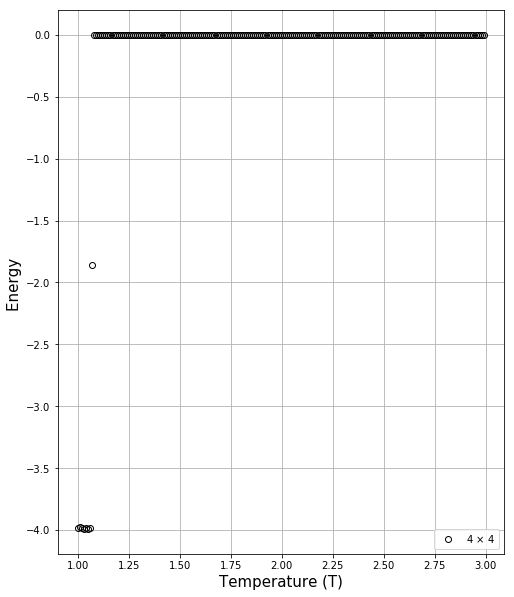

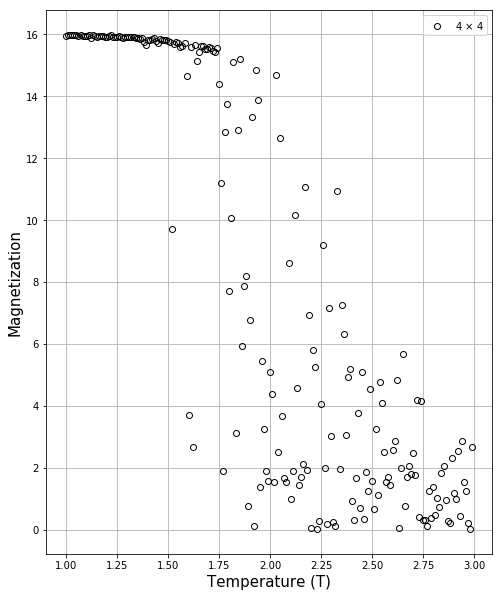

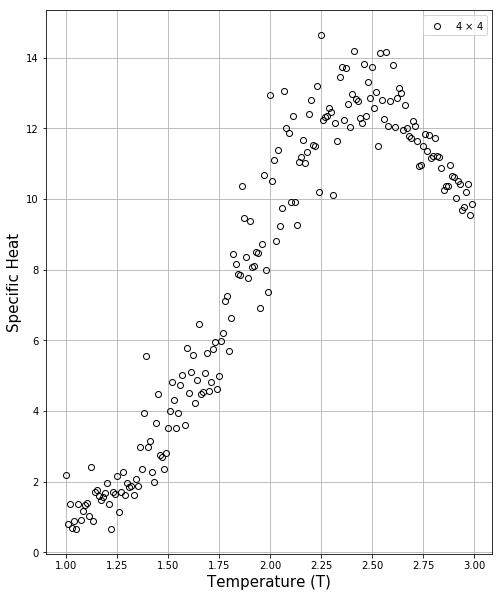

In [18]:

plt.figure(figsize=(8,10))    
plt.plot(T, Energy, 'o', fillstyle='none',color="k", label=r"%d $\times$ %d"%(N,N))
plt.xlabel(r"Temperature (T)", fontsize=15)
plt.ylabel(r"Energy ", fontsize=15)
plt.legend()
plt.grid()
plt.savefig("images_ising/%dx%denergia.png"%(N,N))


plt.figure(figsize=(8,10))    
plt.plot(T, abs(Magnetization), 'o', fillstyle='none', color="k",label=r"%d $\times$ %d"%(N,N))
plt.xlabel(r"Temperature (T)", fontsize=15)
plt.ylabel(r"Magnetization", fontsize=15)
plt.legend()
plt.grid()
plt.savefig("images_ising/%dx%dmagnetizacion.png"%(N,N))


plt.figure(figsize=(8,10))    
plt.plot(T, SpecificHeat, 'o', fillstyle='none', color="k", label=r"%d $\times$ %d"%(N,N))
plt.xlabel(r"Temperature (T)", fontsize=15)
plt.ylabel(r"Specific Heat", fontsize=15)
plt.grid()
plt.legend()
plt.savefig("images_ising/%dx%dcalor_especifico.png"%(N,N))

